In [1]:
import math as math
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
import numpy as np

import matplotlib.pyplot as plt
from utils import get_df_results

import umap
import umap.plot

d:\anaconda\envs\unimol_tools\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\anaconda\envs\unimol_tools\lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [2]:
pkl_path = './Reprs/Model_VPGLA_repr.out.pkl'
lib_path = './Pep_lib_VPGLA.smi'

# load unimol features
df = get_df_results(pkl_path)
df_lib = pd.read_csv(lib_path, delimiter='\t')
len(df_lib)

# Fingerprints
fp_list = []
for i in df_lib.index.to_list():
    mol = Chem.MolFromSmiles(df_lib['SMILES'][i])
    fp = MACCSkeys.GenMACCSKeys(mol)
    fp_list.append(fp)

df_fp = pd.DataFrame(fp_list, columns=['fp'])
X_fp = pd.DataFrame(df_fp['fp'].apply(tuple).to_list())
X_fp.shape

(625, 167)

In [3]:
reducer = umap.UMAP()
# feature_data = X.values
feature_data = X_fp.values
embedding = reducer.fit_transform(feature_data) # default reduces dimensions to 2d.
embedding.shape

(625, 2)

d:\anaconda\envs\unimol_tools\lib\site-packages\umap\plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

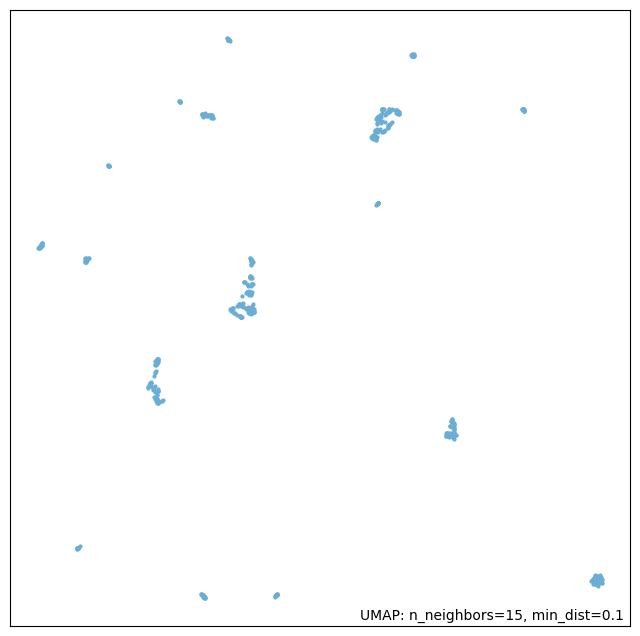

In [4]:
# Umap pca and chemical space visualization
mapper = umap.UMAP().fit(feature_data)
umap.plot.points(mapper)

In [28]:
ls_same_fp = [264, 
269, 
272, 
273, 
274, 
304, 
360, 
429, 
485, 
552, 
553, 
554, 
560, 
585, 
610]

for i in ls_same_fp:
    (df.iloc[i, 2]) = 1

In [30]:
# visualize data and clusters
umap.plot.output_notebook()

hover_data = pd.DataFrame({'index':df.index.tolist(),
                           'label':df['value'],  
                          })

p = umap.plot.interactive(mapper,values=df['value'], cmap = 'rainbow', point_size = 5, hover_data=hover_data) # theme='darkgreen'

umap.plot.show(p)

Loading BokehJS ...